In [1]:
%reload_ext autoreload
%autoreload 2
import sys

sys.path.append('../')

In [453]:
from babelgrid import Babel, Polygon
import geojson
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from copy import deepcopy

# Readme

In [454]:
Babel.available_grids()

['s2', 'h3', 'bing']

In [458]:
tile = Babel('h3').geo_to_tile(lat=-23, lon=-43, area_km=1)
tile

Tile: grid_type "h3", resolution 8, tile_id 88a8a2b66dfffff

In [459]:
tile.geometry.geojson

{'type': 'Polygon',
 'coordinates': (((-42.99741709893686, -23.004282833594505),
   (-42.9932470321478, -23.00127887552568),
   (-42.994161748920796, -22.996608473771282),
   (-42.99924646130203, -22.994942061847414),
   (-43.00341650043048, -22.997946087213307),
   (-43.002501854850166, -23.002616457194414),
   (-42.99741709893686, -23.004282833594505)),)}

In [460]:
tile.geometry.wkt

'POLYGON ((-42.9974170989368574 -23.0042828335945053, -42.9932470321477993 -23.0012788755256814, -42.9941617489207957 -22.9966084737712819, -42.9992464613020289 -22.9949420618474143, -43.0034165004304825 -22.9979460872133075, -43.0025018548501663 -23.0026164571944136, -42.9974170989368574 -23.0042828335945053))'

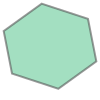

In [464]:
tile.geometry.shapely

In [465]:
tiles = Babel('s2').polyfill(geometry, resolution=10)
tiles

[Tile: grid_type "s2", resolution 10, tile_id 94d28d,
 Tile: grid_type "s2", resolution 10, tile_id 94d28f,
 Tile: grid_type "s2", resolution 10, tile_id 94d291,
 Tile: grid_type "s2", resolution 10, tile_id 94d293,
 Tile: grid_type "s2", resolution 10, tile_id 94d295,
 Tile: grid_type "s2", resolution 10, tile_id 94d297,
 Tile: grid_type "s2", resolution 10, tile_id 94d299,
 Tile: grid_type "s2", resolution 10, tile_id 94d29b,
 Tile: grid_type "s2", resolution 10, tile_id 94d29f,
 Tile: grid_type "s2", resolution 10, tile_id 94d2a1,
 Tile: grid_type "s2", resolution 10, tile_id 94d2a3,
 Tile: grid_type "s2", resolution 10, tile_id 94d2a5,
 Tile: grid_type "s2", resolution 10, tile_id 94d2b9,
 Tile: grid_type "s2", resolution 10, tile_id 94d2bb,
 Tile: grid_type "s2", resolution 10, tile_id 94d2bd,
 Tile: grid_type "s2", resolution 10, tile_id 94d2bf,
 Tile: grid_type "s2", resolution 10, tile_id 94d2c1,
 Tile: grid_type "s2", resolution 10, tile_id 94d2c3,
 Tile: grid_type "s2", resol

In [470]:
gpd.GeoDataFrame([t.to_dict() for t in tiles], geometry='shapely')

,grid_type,tile_id,resolution,parent_id,children_id,geojson,wkt,shapely,centroid
0,s2,94d28d,10,94d28c,"[94d28c4, 94d28cc, 94d28d4, 94d28dc]","{'type': 'Polygon', 'coordinates': (((-45.5251...",POLYGON ((-45.5251982256658536 -23.94993860518...,"POLYGON ((-45.52520 -23.94994, -45.52520 -24.0...","(-45.48750782181065, -23.973826314059846)"
1,s2,94d28f,10,94d28c,"[94d28e4, 94d28ec, 94d28f4, 94d28fc]","{'type': 'Polygon', 'coordinates': (((-45.5251...",POLYGON ((-45.5251982256658536 -23.87464802016...,"POLYGON ((-45.52520 -23.87465, -45.52520 -23.9...","(-45.48750783764534, -23.89856890781872)"
2,s2,94d291,10,94d294,"[94d2904, 94d290c, 94d2914, 94d291c]","{'type': 'Polygon', 'coordinates': (((-45.4498...",POLYGON ((-45.4498065303203163 -23.84722793411...,"POLYGON ((-45.44981 -23.84723, -45.44981 -23.9...","(-45.412176645927694, -23.871114016490193)"
3,s2,94d293,10,94d294,"[94d2924, 94d292c, 94d2934, 94d293c]","{'type': 'Polygon', 'coordinates': (((-45.4498...",POLYGON ((-45.4498065303203163 -23.92245311959...,"POLYGON ((-45.44981 -23.92245, -45.44981 -23.9...","(-45.4121766301297, -23.94630607876826)"
4,s2,94d295,10,94d294,"[94d2944, 94d294c, 94d2954, 94d295c]","{'type': 'Polygon', 'coordinates': (((-45.3745...",POLYGON ((-45.3745358370629788 -23.89496337452...,"POLYGON ((-45.37454 -23.89496, -45.37454 -23.9...","(-45.33696647881146, -23.91878167786052)"
5,s2,94d297,10,94d294,"[94d2964, 94d296c, 94d2974, 94d297c]","{'type': 'Polygon', 'coordinates': (((-45.3745...",POLYGON ((-45.3745358370629788 -23.81980366773...,"POLYGON ((-45.37454 -23.81980, -45.37454 -23.8...","(-45.3369664945726, -23.843655038593642)"
6,s2,94d299,10,94d29c,"[94d2984, 94d298c, 94d2994, 94d299c]","{'type': 'Polygon', 'coordinates': (((-45.3745...",POLYGON ((-45.3745358370629788 -23.74464369915...,"POLYGON ((-45.37454 -23.74464, -45.37454 -23.8...","(-45.33696651029625, -23.768528027646873)"
7,s2,94d29b,10,94d29c,"[94d29a4, 94d29ac, 94d29b4, 94d29bc]","{'type': 'Polygon', 'coordinates': (((-45.4498...",POLYGON ((-45.4498065303203163 -23.77200229759...,"POLYGON ((-45.44981 -23.77200, -45.44981 -23.8...","(-45.41217666168818, -23.795921393123542)"
8,s2,94d29f,10,94d29c,"[94d29e4, 94d29ec, 94d29f4, 94d29fc]","{'type': 'Polygon', 'coordinates': (((-45.3745...",POLYGON ((-45.3745358370629788 -23.66948387792...,"POLYGON ((-45.37454 -23.66948, -45.37454 -23.7...","(-45.336966525982184, -23.693401053609588)"
9,s2,94d2a1,10,94d2a4,"[94d2a04, 94d2a0c, 94d2a14, 94d2a1c]","{'type': 'Polygon', 'coordinates': (((-45.2993...",POLYGON ((-45.2993862225866550 -23.64218737747...,"POLYGON ((-45.29939 -23.64219, -45.29939 -23.7...","(-45.26187749037116, -23.666069824170176)"


In [471]:
Babel('s2').geo_to_tile(2, 3, resolution=10)

Tile: grid_type "s2", resolution 10, tile_id 100fb1

In [472]:
Babel('bing').geo_to_tile(2, 3, area_km=0.1)

Tile: grid_type "bing", resolution 17, tile_id 12222230201200322

In [473]:
Babel('bing').geo_to_tile(2, 3, area_km=0.1).area_km

0.0934819087

In [474]:
Babel('s2').id_to_tile('100fb1')

Tile: grid_type "s2", resolution 10, tile_id 100fb1

In [475]:
tiles = Babel('bing').polyfill(geometry, area_km=10)
tiles

[Tile: grid_type "bing", resolution 14, tile_id 21031113121331,
 Tile: grid_type "bing", resolution 14, tile_id 21031113121333,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123110,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123111,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123112,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123113,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123130,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123131,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123132,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123133,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123223,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123231,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123232,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123233,
 Tile: grid_type "bing", resolution 14, tile_id 21031113123301,
 Tile: grid_type "bing", resolution 14, 

# Polyfill

In [426]:
areas = [10, 1, 0.1]

gdf = gpd.GeoDataFrame()

for area in areas:
    
    tiles = []
    for grid in Babel.available_grids():
        tiles = tiles + [t.to_dict() for t in Babel(grid).polyfill(geometry, area_km=area)]
        
    tiles = gpd.GeoDataFrame(deepcopy(tiles), geometry='shapely')[['grid_type', 'shapely']]
    tiles['area'] = area
    
    gdf = pd.concat([gdf, deepcopy(gpd.GeoDataFrame(tiles, geometry='shapely'))])

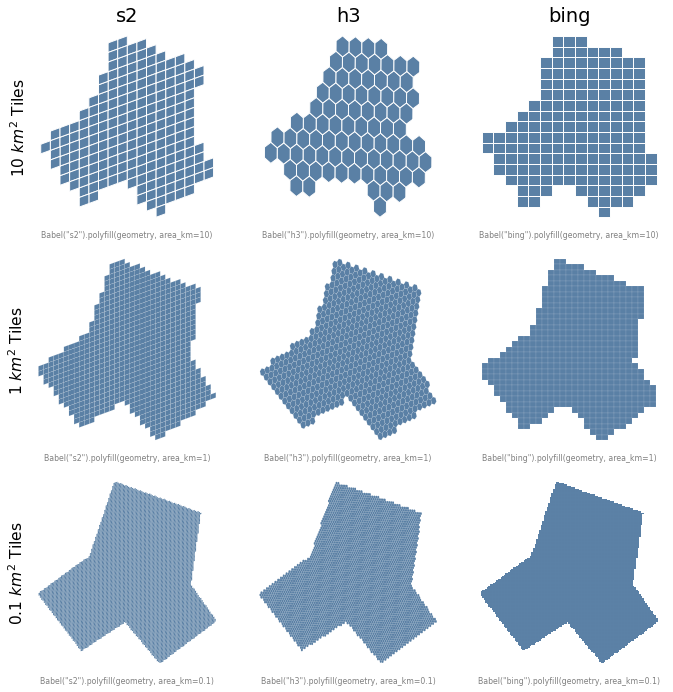

In [452]:
nrows = len(areas)
ncols = len(Babel.available_grids())
fontsize = 20

fig, ax = plt.subplots(nrows=nrows, ncols=ncols,
                      figsize=(10, 10), dpi=70)

for r, area in enumerate(areas):
    for c, grid in enumerate(Babel.available_grids()):
        
        axis = ax[r][c]
        df = gdf.query(f'grid_type == "{grid}"').query(f'area == {area}')
        
        df.plot(facecolor='#5A80A5', edgecolor='white', ax=axis, linewidth=area/10)
        
        if r == 0:
            axis.set_title(grid, fontsize=fontsize)
        if c == 0:
            axis.set_ylabel(f'{area} $km^2$ Tiles', fontsize=fontsize-4)
            
        axis.set_xlabel(f'Babel("{grid}").polyfill(geometry, area_km={area})', fontsize=8, color='grey')

        for k in axis.spines.keys():
            axis.spines[k].set_visible(False)
            
        axis.set_yticks([])
        axis.set_xticks([])

fig.tight_layout()

# Folium

In [351]:
geometry = geojson.load(open('example_geojson.json'))
tiles = Babel('h3').polyfill(geometry, area_km=1)

m = folium.Map(location=(-23.86, -45.33), 
               zoom_start=11, width=500, height=550)
folium.GeoJson(geometry, style_function=lambda x: {'color': 'red'}).add_to(m)
for tile in tiles:
    folium.GeoJson(tile.geometry.geojson).add_to(m)   
m

# Grid Analysis 

In [157]:
areas = pd.DataFrame()
for grid in Babel.available_grids():
    print(grid)
    areas = pd.concat([areas, pd.DataFrame([
        {'grid_type': grid,
         'lat': lat,
         'resolution': resolution,
         'area': Babel(grid).geo_to_tile(lat, 0, resolution).area_km} 
                for lat in range(-85, 90, 5) 
                for resolution in Babel(grid).grid_range()
    ])])

s2
h3
bing


## Save grid reference

In [207]:
(areas
.dropna()
.query('area > 0')
).to_csv('grids_area_reference.csv', sep='|', index=False)

## Area Distortion

In [176]:
df = (areas
      .dropna()
      .query('area > 0')
      .groupby(['grid_type', 'resolution'])
      .apply(lambda x: x.assign(ratio=lambda y: y['area'] / y['area'].min()))
      .reset_index(drop=True)
      .groupby(['grid_type', 'lat']).agg(['mean', 'std'])
      .reset_index()
     )
df.columns = [' '.join(col).strip() for col in df.columns.values]

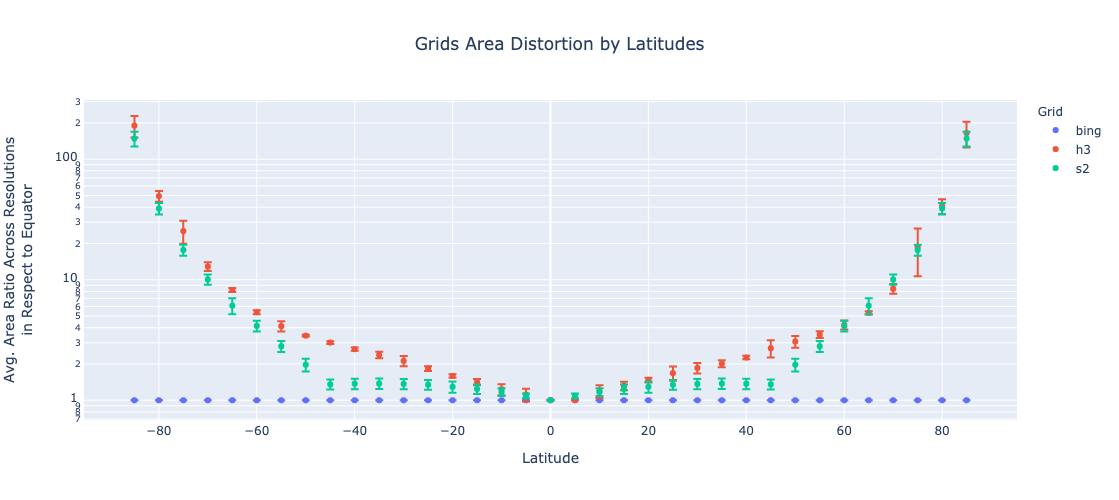

In [179]:
px.scatter(df, x='lat', y='ratio mean', 
           error_y='ratio std',
           color='grid_type',
           title=f'Grids Area Distortion by Latitudes',
           height=500, width=700,
           log_y=True,
           labels={'ratio mean': 'Avg. Area Ratio Across Resolutions<br>in Respect to Equator',
                   'lat': 'Latitude', 'grid_type': 'Grid'}
          ).update(layout=dict(title=dict(x=0.5)))

## Area by Resolution

In [185]:
df1 = (areas
 .dropna()
 .query('area > 0')
 .query('lat == 0')
)

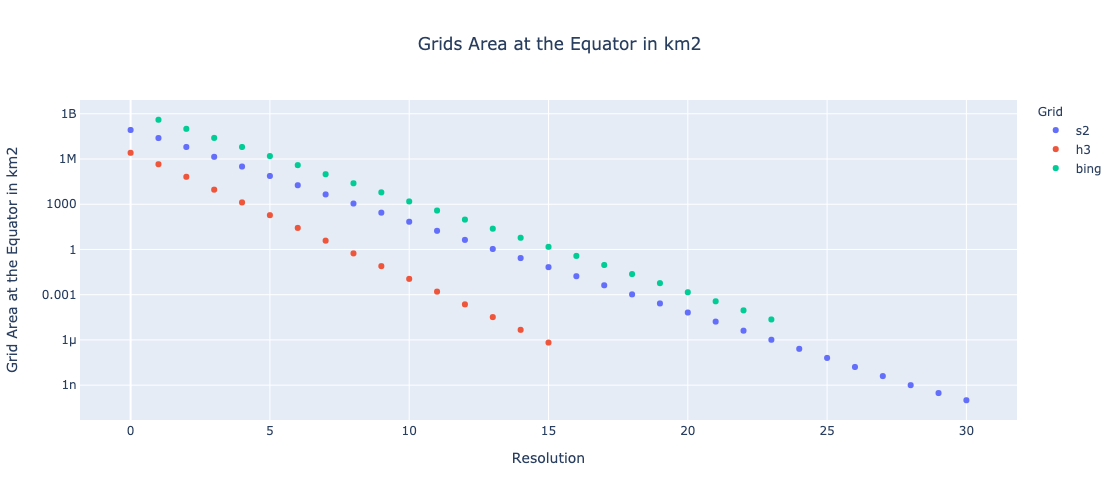

In [190]:
px.scatter(df1, x='resolution', y='area', 
           color='grid_type',
           title=f'Grids Area at the Equator in km2',
           height=500, width=700,
           log_y=True,
           labels={'area': 'Grid Area at the Equator in km2',
                   'resolution': 'Resolution', 'grid_type': 'Grid'}
          ).update(layout=dict(title=dict(x=0.5)))

In [205]:
df2 = (areas
 .dropna()
 .query('area > 0')
 .query('grid_type == "h3"'))

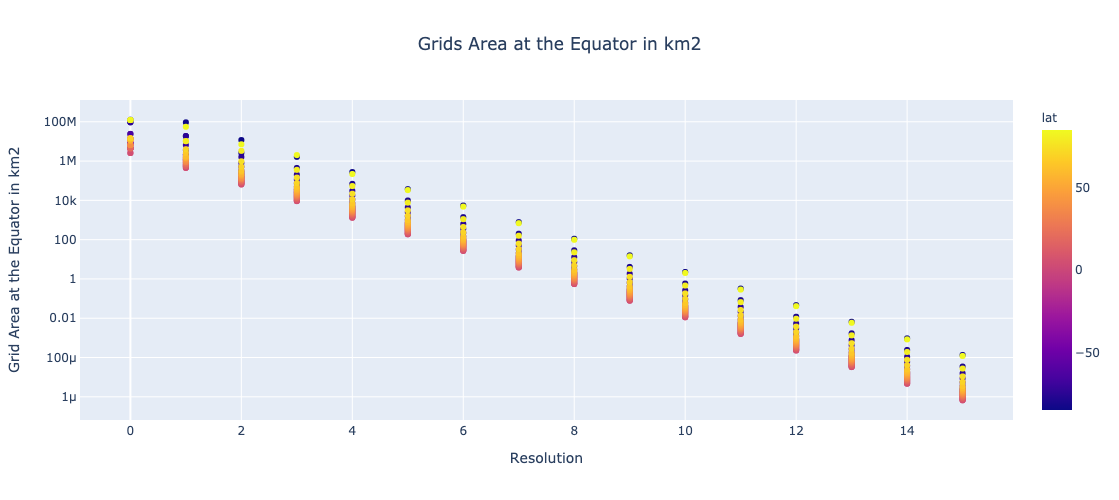

In [206]:
px.scatter(df2, y='area', x='resolution', 
           color='lat',
           title=f'Grids Area at the Equator in km2',
           height=500, width=700,
           log_y=True,
           labels={'area': 'Grid Area at the Equator in km2',
                   'resolution': 'Resolution', 'grid_type': 'Grid'}
          ).update(layout=dict(title=dict(x=0.5)))

## Reference Table

In [484]:
import numpy as np

In [504]:
areas = pd.read_csv('grids_area_reference.csv', sep='|')

In [505]:
areas['area_cat'] = areas['area'].apply(np.log10).apply(round)

In [508]:
areas.groupby(['grid_type', 'resolution'])['area'].agg(['min', 'mean', 'max'])

min          mean           max
grid_type resolution                                          
bing      1           4.015017e+08  4.015017e+08  4.015017e+08
          2           1.003754e+08  1.003754e+08  1.003754e+08
          3           2.509386e+07  2.509386e+07  2.509386e+07
          4           6.273465e+06  6.273465e+06  6.273465e+06
          5           1.568366e+06  1.568366e+06  1.568366e+06
...                            ...           ...           ...
s2        26          1.610000e-08  2.221571e-07  2.348300e-06
          27          4.000000e-09  5.553143e-08  5.871000e-07
          28          1.000000e-09  1.387429e-08  1.468000e-07
          29          3.000000e-10  3.477143e-09  3.670000e-08
          30          1.000000e-10  8.771429e-10  9.200000e-09

[70 rows x 3 columns]

In [525]:
def aggfunc(x):
    
    return  ','.join([str(i) for i in x.sort_values().unique()])

In [539]:
print((areas
     .query('lat == 0')
     .pivot_table(columns='grid_type', index='area_cat', values='resolution', aggfunc=aggfunc)
     .sort_index(ascending=False).fillna('-')
     [['h3', 's2', 'bing']]
     .rename(columns={'h3': 'H3', 's2': 'S2', 'bing': 'BING/QuadTree'},
             index={'area_cat': 'Area in 10^x km'})
).to_markdown())

|   area_cat | H3    | S2    | BING/QuadTree   |
|-----------:|:------|:------|:----------------|
|          9 | -     | -     | 1               |
|          8 | -     | 0     | 2               |
|          7 | -     | 1,2   | 3,4             |
|          6 | 0,1   | 3,4   | 5,6             |
|          5 | 2     | 5     | 7               |
|          4 | 3     | 6,7   | 8,9             |
|          3 | 4     | 8     | 10,11           |
|          2 | 5     | 9,10  | 12              |
|          1 | 6,7   | 11,12 | 13,14           |
|          0 | 8     | 13    | 15,16           |
|         -1 | 9     | 14,15 | 17              |
|         -2 | 10    | 16,17 | 18,19           |
|         -3 | 11    | 18    | 20,21           |
|         -4 | 12,13 | 19,20 | 22              |
|         -5 | 14    | 21,22 | 23              |
|         -6 | 15    | 23    | -               |
|         -7 | -     | 24,25 | -               |
|         -8 | -     | 26,27 | -               |
|         -9 | -    

In [533]:
areas.rename(index='a')

TypeError: Index(...) must be called with a collection of some kind, 'a' was passed

In [522]:
a.sort_values()

535      0
1439     0
1423     0
1407     0
442      0
        ..
596     30
813     30
985     30
689     30
658     30
Name: resolution, Length: 2404, dtype: int64